In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename1 = "Data/dataset.npz"
filename2 = "Data/dataset2.npz"

# Load numpy array
dataset1 = np.load(filename1)
dataset2 = np.load(filename2)

x_dataset_full = np.concatenate((dataset1['x'], dataset2['x']))
y_dataset_full = np.concatenate((dataset1['y'], dataset2['y']))

x_test = x_dataset_full[12800:16000]
y_test = y_dataset_full[12800:16000]

x_dataset = x_dataset_full[:12800]
y_dataset = y_dataset_full[:12800]

x_val = x_dataset[10240:]
y_val = y_dataset[10240:]

x_train = x_dataset[:10240]
y_train = y_dataset[:10240]

# Assign and reshape data
x_train, y_train = x_train.reshape(10240, 1280, 64), y_train.reshape(10240, 1280, 64)
x_val, y_val = x_val.reshape(2560, 1280, 64), y_val.reshape(2560, 1280, 64)
x_test, y_test = x_test.reshape(3200, 1280, 64), y_test.reshape(3200, 1280, 64)

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (10240, 1280, 64) (10240, 1280, 64)
Validation shape:  (2560, 1280, 64) (2560, 1280, 64)
Test shape:  (3200, 1280, 64) (3200, 1280, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(1280, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1280, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 10240 samples, validate on 2560 samples
Epoch 1/500
10240/10240 [==============================] - 332s 32ms/step - loss: 0.0882 - acc: 0.0183 - val_loss: 0.0566 - val_acc: 0.0121
Epoch 2/500
10240/10240 [==============================] - 349s 34ms/step - loss: 0.0719 - acc: 0.0128 - val_loss: 0.0479 - val_acc: 0.0107
Epoch 3/500
10240/10240 [==============================] - 351s 34ms/step - loss: 0.0645 - acc: 0.0115 - val_loss: 0.0433 - val_acc: 0.0090
Epoch 4/500
10240/10240 [==============================] - 309s 30ms/step - loss: 0.0600 - acc: 0.0110 - val_loss: 0.0400 - val_acc: 0.0085
Epoch 5/500
10240/10240 [==============================] 

10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.1489 - val_loss: 0.0223 - val_acc: 0.1287
Epoch 56/500
10240/10240 [==============================] - 304s 30ms/step - loss: 0.0373 - acc: 0.1406 - val_loss: 0.0223 - val_acc: 0.1308
Epoch 57/500
10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.1446 - val_loss: 0.0222 - val_acc: 0.2283
Epoch 58/500
10240/10240 [==============================] - 304s 30ms/step - loss: 0.0373 - acc: 0.1501 - val_loss: 0.0222 - val_acc: 0.1352
Epoch 59/500
10240/10240 [==============================] - 305s 30ms/step - loss: 0.0373 - acc: 0.1482 - val_loss: 0.0222 - val_acc: 0.1429
Epoch 60/500
10240/10240 [==============================] - 306s 30ms/step - loss: 0.0373 - acc: 0.1554 - val_loss: 0.0222 - val_acc: 0.1407
Epoch 61/500
10240/10240 [==============================] - 304s 30ms/step - loss: 0.0373 - acc: 0.1605 - val_loss: 0.0222 - val_acc: 0.1553
Epoch 62/500
10240/10240 [

10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2107 - val_loss: 0.0222 - val_acc: 0.1896
Epoch 114/500
10240/10240 [==============================] - 297s 29ms/step - loss: 0.0373 - acc: 0.2118 - val_loss: 0.0222 - val_acc: 0.1948
Epoch 115/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2156 - val_loss: 0.0222 - val_acc: 0.1893
Epoch 116/500
10240/10240 [==============================] - 298s 29ms/step - loss: 0.0373 - acc: 0.2055 - val_loss: 0.0222 - val_acc: 0.1939
Epoch 117/500
10240/10240 [==============================] - 297s 29ms/step - loss: 0.0373 - acc: 0.2084 - val_loss: 0.0222 - val_acc: 0.1926
Epoch 118/500
10240/10240 [==============================] - 298s 29ms/step - loss: 0.0373 - acc: 0.2105 - val_loss: 0.0222 - val_acc: 0.1948
Epoch 119/500
10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2188 - val_loss: 0.0222 - val_acc: 0.1935
Epoch 120/500
10240/

Epoch 171/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2229 - val_loss: 0.0222 - val_acc: 0.2009
Epoch 172/500
10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.2209 - val_loss: 0.0222 - val_acc: 0.2283
Epoch 173/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2285 - val_loss: 0.0222 - val_acc: 0.2050
Epoch 174/500
10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2210 - val_loss: 0.0222 - val_acc: 0.2038
Epoch 175/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2242 - val_loss: 0.0222 - val_acc: 0.2051
Epoch 176/500
10240/10240 [==============================] - 302s 29ms/step - loss: 0.0373 - acc: 0.2199 - val_loss: 0.0222 - val_acc: 0.2056
Epoch 177/500
10240/10240 [==============================] - 302s 30ms/step - loss: 0.0373 - acc: 0.2179 - val_loss: 0.0222 - val_acc: 0.2056
Epoch 

10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2276 - val_loss: 0.0222 - val_acc: 0.2698
Epoch 229/500
10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.2281 - val_loss: 0.0222 - val_acc: 0.2179
Epoch 230/500
10240/10240 [==============================] - 302s 29ms/step - loss: 0.0373 - acc: 0.2393 - val_loss: 0.0222 - val_acc: 0.2109
Epoch 231/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2283 - val_loss: 0.0222 - val_acc: 0.2337
Epoch 232/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2276 - val_loss: 0.0222 - val_acc: 0.2144
Epoch 233/500
10240/10240 [==============================] - 298s 29ms/step - loss: 0.0373 - acc: 0.2277 - val_loss: 0.0222 - val_acc: 0.2091
Epoch 234/500
10240/10240 [==============================] - 297s 29ms/step - loss: 0.0373 - acc: 0.2288 - val_loss: 0.0222 - val_acc: 0.2171
Epoch 235/500
10240/

Epoch 286/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2365 - val_loss: 0.0222 - val_acc: 0.2189
Epoch 287/500
10240/10240 [==============================] - 305s 30ms/step - loss: 0.0373 - acc: 0.2347 - val_loss: 0.0222 - val_acc: 0.2175
Epoch 288/500
10240/10240 [==============================] - 302s 29ms/step - loss: 0.0373 - acc: 0.2400 - val_loss: 0.0222 - val_acc: 0.2188
Epoch 289/500
10240/10240 [==============================] - 304s 30ms/step - loss: 0.0373 - acc: 0.2451 - val_loss: 0.0222 - val_acc: 0.2255
Epoch 290/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2388 - val_loss: 0.0222 - val_acc: 0.2188
Epoch 291/500
10240/10240 [==============================] - 302s 30ms/step - loss: 0.0373 - acc: 0.2367 - val_loss: 0.0222 - val_acc: 0.2176
Epoch 292/500
10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.2350 - val_loss: 0.0222 - val_acc: 0.2164
Epoch 

10240/10240 [==============================] - 306s 30ms/step - loss: 0.0373 - acc: 0.2357 - val_loss: 0.0222 - val_acc: 0.2221
Epoch 344/500
10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2501 - val_loss: 0.0222 - val_acc: 0.2258
Epoch 345/500
10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.2396 - val_loss: 0.0222 - val_acc: 0.2258
Epoch 346/500
10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2478 - val_loss: 0.0222 - val_acc: 0.2259
Epoch 347/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2464 - val_loss: 0.0222 - val_acc: 0.2254
Epoch 348/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2378 - val_loss: 0.0222 - val_acc: 0.2267
Epoch 349/500
10240/10240 [==============================] - 296s 29ms/step - loss: 0.0373 - acc: 0.2411 - val_loss: 0.0222 - val_acc: 0.2257
Epoch 350/500
10240/

Epoch 401/500
10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2410 - val_loss: 0.0222 - val_acc: 0.2297
Epoch 402/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2450 - val_loss: 0.0222 - val_acc: 0.2371
Epoch 403/500
10240/10240 [==============================] - 298s 29ms/step - loss: 0.0373 - acc: 0.2525 - val_loss: 0.0222 - val_acc: 0.2399
Epoch 404/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2471 - val_loss: 0.0222 - val_acc: 0.2300
Epoch 405/500
10240/10240 [==============================] - 304s 30ms/step - loss: 0.0373 - acc: 0.2524 - val_loss: 0.0222 - val_acc: 0.2293
Epoch 406/500
10240/10240 [==============================] - 302s 30ms/step - loss: 0.0373 - acc: 0.2448 - val_loss: 0.0222 - val_acc: 0.2307
Epoch 407/500
10240/10240 [==============================] - 304s 30ms/step - loss: 0.0373 - acc: 0.2694 - val_loss: 0.0222 - val_acc: 0.2286
Epoch 

10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2589 - val_loss: 0.0222 - val_acc: 0.2363
Epoch 459/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2616 - val_loss: 0.0222 - val_acc: 0.2381
Epoch 460/500
10240/10240 [==============================] - 303s 30ms/step - loss: 0.0373 - acc: 0.2489 - val_loss: 0.0222 - val_acc: 0.2389
Epoch 461/500
10240/10240 [==============================] - 300s 29ms/step - loss: 0.0373 - acc: 0.2523 - val_loss: 0.0222 - val_acc: 0.2388
Epoch 462/500
10240/10240 [==============================] - 301s 29ms/step - loss: 0.0373 - acc: 0.2548 - val_loss: 0.0222 - val_acc: 0.2409
Epoch 463/500
10240/10240 [==============================] - 299s 29ms/step - loss: 0.0373 - acc: 0.2545 - val_loss: 0.0222 - val_acc: 0.2397
Epoch 464/500
10240/10240 [==============================] - 305s 30ms/step - loss: 0.0373 - acc: 0.2534 - val_loss: 0.0222 - val_acc: 0.2381
Epoch 465/500
10240/

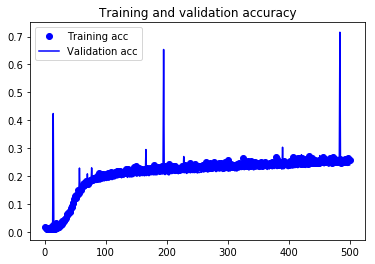

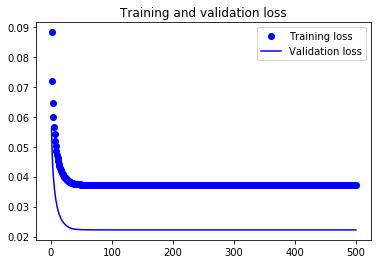

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

3200/3200 [==============================] - 41s 13ms/step
Test accuracy: 0.1716582030057907
Test loss: 0.041925575754239615
